In [1]:
import os
print("Estoy trabajando en:", os.getcwd())

# Verificar si el archivo existe desde la visión de Python
path_nacional = '../Datos/covidtracking/national-history.csv'
print(f"¿Existe el archivo?: {os.path.exists(path_nacional)}")

Estoy trabajando en: c:\Users\Coder\Proyectos\EDA_JJ_20260206\notebooks
¿Existe el archivo?: True


In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("¡Todo funciona correctamente!")

¡Todo funciona correctamente!


In [3]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética de los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar los datasets
# Asegúrate de que la ruta sea correcta según donde guardaste los archivos
df_national = pd.read_csv('../Datos/covidtracking/national-history.csv')
df_states = pd.read_csv('../Datos/covidtracking/all-states-history.csv')

# Mostrar las primeras filas para verificar
print("Datos Nacionales:")
display(df_national.head(3))
print("\nDatos por Estados:")
display(df_states.head(3))


Datos Nacionales:


,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992
2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417



Datos por Estados:


,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380


In [4]:
# Ver información general (columnas, tipos de datos, nulos)
print("--- Info Dataset Nacional ---")
df_national.info()

print("\n--- Info Dataset Estados ---")
df_states.info()

--- Info Dataset Nacional ---
<class 'pandas.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    str    
 1   death                     392 non-null    float64
 2   deathIncrease             420 non-null    int64  
 3   inIcuCumulative           348 non-null    float64
 4   inIcuCurrently            347 non-null    float64
 5   hospitalizedIncrease      420 non-null    int64  
 6   hospitalizedCurrently     356 non-null    float64
 7   hospitalizedCumulative    369 non-null    float64
 8   negative                  372 non-null    float64
 9   negativeIncrease          420 non-null    int64  
 10  onVentilatorCumulative    341 non-null    float64
 11  onVentilatorCurrently     348 non-null    float64
 12  positive                  419 non-null    float64
 13  positiveIncrease          420 non-null    int6

In [5]:
# 1. Convertir columna 'date' a formato datetime
df_national['date'] = pd.to_datetime(df_national['date'])
df_states['date'] = pd.to_datetime(df_states['date'])

# 2. Ordenar los datos por fecha (del pasado al presente)
df_national = df_national.sort_values('date')
df_states = df_states.sort_values('date')

# 3. Verificar duplicados
print(f"Duplicados en nacional: {df_national.duplicated().sum()}")
print(f"Duplicados en estados: {df_states.duplicated().sum()}")

# 4. Manejo básico de nulos (Ejemplo: rellenar muertes con 0 si es el inicio de la pandemia)
# Nota: En series temporales, a veces es mejor usar .fillna(0) solo donde tenga sentido lógico.
df_national['death'] = df_national['death'].fillna(0)

Duplicados en nacional: 0
Duplicados en estados: 0


In [6]:
# Seleccionar columnas clave para el análisis
cols_interes = ['date', 'death', 'deathIncrease', 'positive', 'positiveIncrease', 'hospitalizedCurrently']
df_national_subset = df_national[cols_interes].copy()

# Crear métrica nueva: Tasa de positividad (Positivos / Tests Totales) si quisieras
# df_national['positivity_rate'] = df_national['positive'] / df_national['totalTestResults']

df_national_subset.tail() # Ver los últimos datos (los más recientes)

,date,death,deathIncrease,positive,positiveIncrease,hospitalizedCurrently
4,2021-03-03,508665.0,2449,28520365.0,66836,45462.0
3,2021-03-04,510408.0,1743,28585852.0,65487,44172.0
2,2021-03-05,512629.0,2221,28654639.0,68787,42541.0
1,2021-03-06,514309.0,1680,28714654.0,60015,41401.0
0,2021-03-07,515151.0,842,28756489.0,41835,40199.0


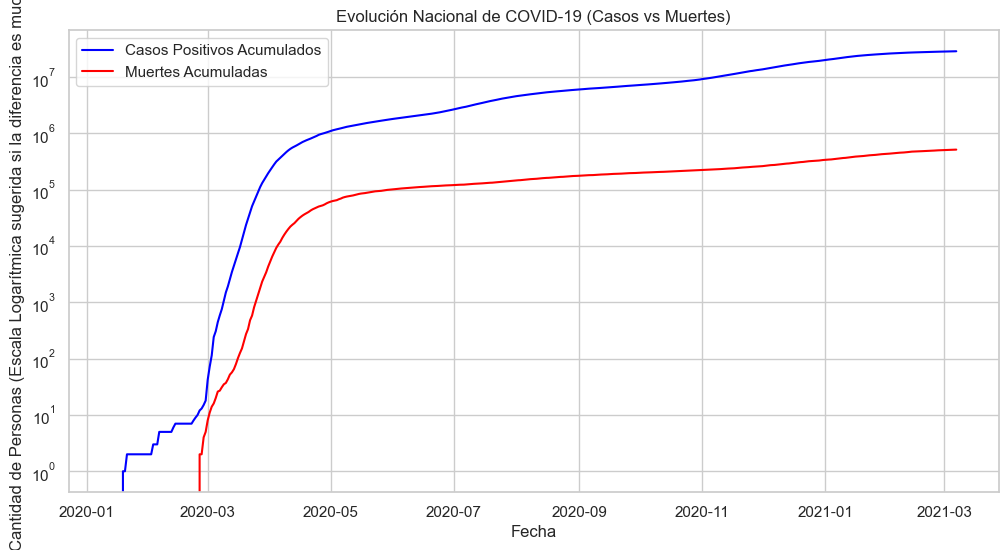

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_national, x='date', y='positive', label='Casos Positivos Acumulados', color='blue')
sns.lineplot(data=df_national, x='date', y='death', label='Muertes Acumuladas', color='red')

plt.title('Evolución Nacional de COVID-19 (Casos vs Muertes)')
plt.ylabel('Cantidad de Personas (Escala Logarítmica sugerida si la diferencia es mucha)')
plt.yscale('log') # Usamos escala logarítmica porque los casos son muchos más que las muertes
plt.xlabel('Fecha')
plt.legend()
plt.show()

C:\Users\Coder\AppData\Local\Temp\ipykernel_53056\3372414300.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_deaths, x='state', y='death', palette='viridis')


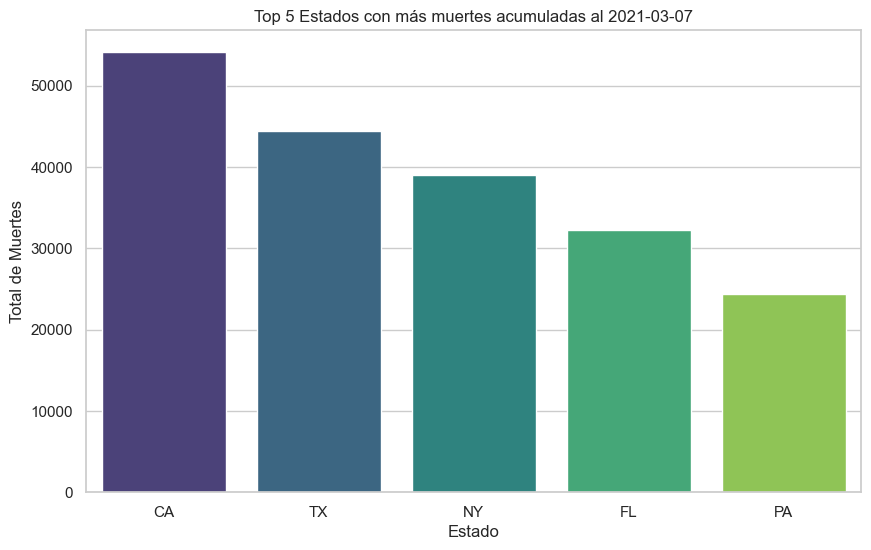

In [8]:
# Obtener los datos más recientes de cada estado (la última fecha disponible)
last_date = df_states['date'].max()
df_last_states = df_states[df_states['date'] == last_date]

# Ordenar y tomar el Top 5
top_5_deaths = df_last_states.sort_values('death', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_deaths, x='state', y='death', palette='viridis')
plt.title(f'Top 5 Estados con más muertes acumuladas al {last_date.date()}')
plt.xlabel('Estado')
plt.ylabel('Total de Muertes')
plt.show()

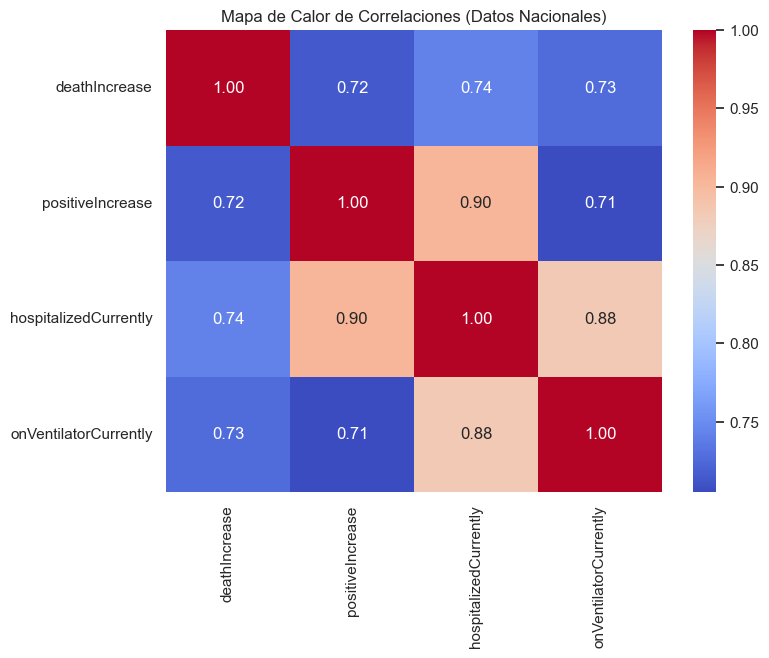

In [9]:
# Calcular matriz de correlación
corr_matrix = df_national[['deathIncrease', 'positiveIncrease', 'hospitalizedCurrently', 'onVentilatorCurrently']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones (Datos Nacionales)')
plt.show()